<a href="https://colab.research.google.com/github/DJAMPOU/bitcoin/blob/main/Copie_de_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
bitcoin = pd.read_csv('sample_data/BTC-EUR.csv', index_col = 'Date', parse_dates = True)

In [ ]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


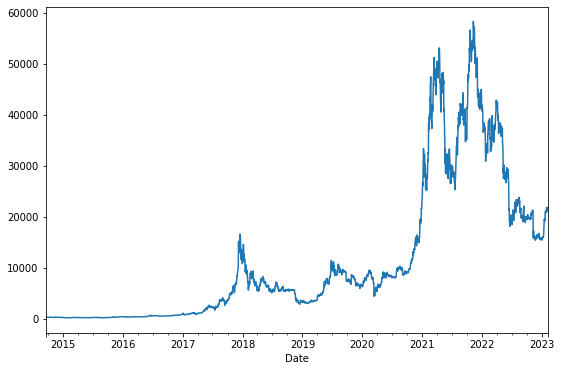

In [ ]:
bitcoin['Close'].plot(figsize=(9, 6))
plt.show()

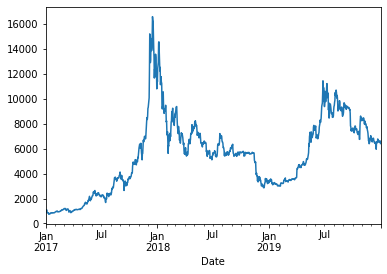

In [ ]:
bitcoin['2017' : '2019']['Close'].plot()

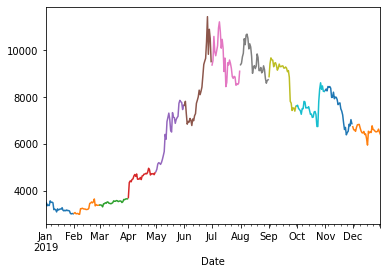

In [ ]:
bitcoin.loc['2019', 'Close'].resample('M').plot()
plt.show()

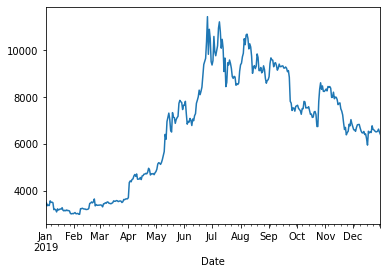

In [ ]:
bitcoin.loc['2019', 'Close'].plot()
plt.show()

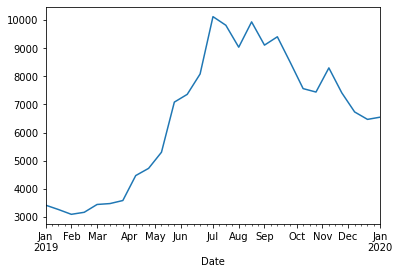

In [ ]:
bitcoin.loc['2019', 'Close'].resample('2w').mean().plot()
plt.show()

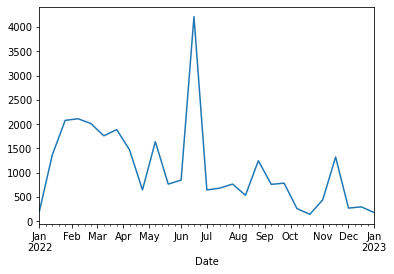

In [ ]:
bitcoin.loc['2022', 'Close'].resample('2w').std().plot()
plt.show()

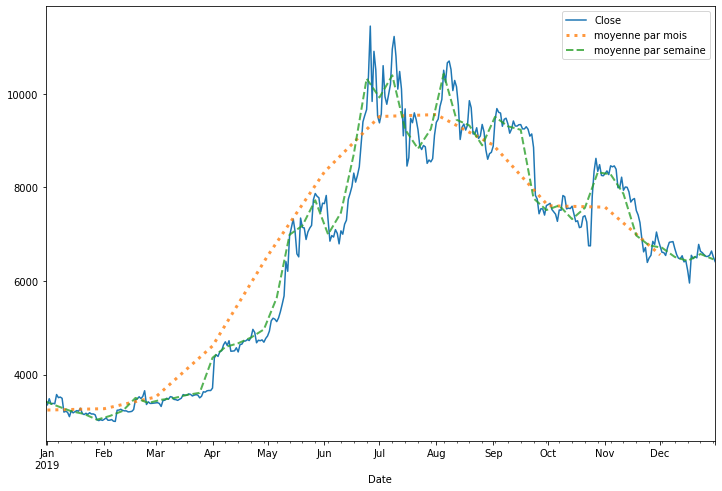

In [ ]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label = 'moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label = 'moyenne par semaine', lw=2, ls='--', alpha =  0.8)
plt.legend()
plt.show()

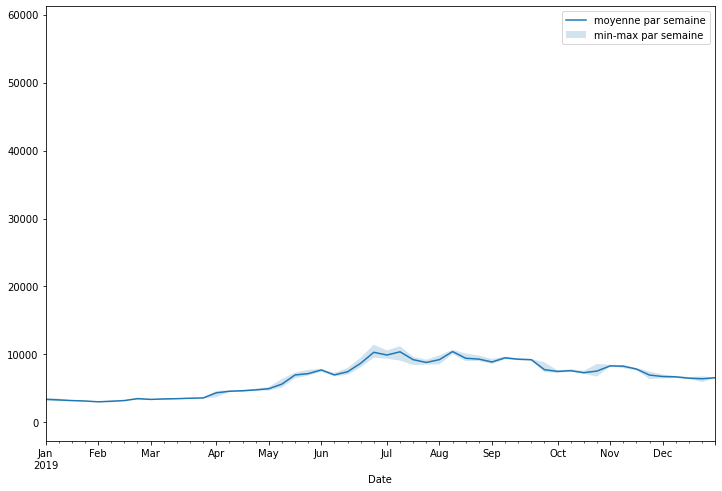

In [ ]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha = 0.2, label = 'min-max par semaine')

plt.legend()
plt.show()

moving *average*
exp weighted function

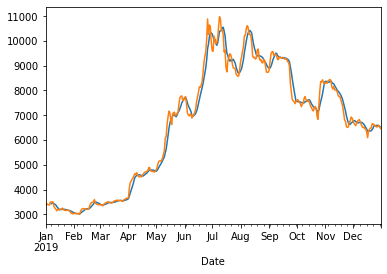

In [ ]:
bitcoin.loc['2019', 'Close'].rolling(window= 7).mean().plot()
bitcoin.loc['2019', 'Close'].ewm(alpha= 0.6).mean().plot()

assembler deux datas set


In [ ]:
ethereum = pd.read_csv('sample_data/ETH-EUR.csv', index_col='Date', parse_dates=True)

<ipython-input-14-9c8cc843e240>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ethereum['2019']['Close'].plot()


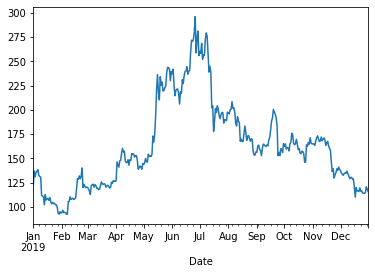

In [ ]:
ethereum['2019']['Close'].plot()

In [ ]:
btc_eth = pd.merge(bitcoin, ethereum, on = 'Date', how='inner', suffixes=('_btc', '_eth'))

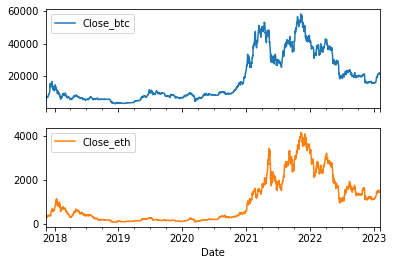

In [ ]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots = True)
plt.show()

In [ ]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.00000,0.92743
Close_eth,0.92743,1.00000


In [ ]:
bitcoin['Buy'] = np.zeros(len(bitcoin))
bitcoin['Sell'] = np.zeros(len(bitcoin))
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,Buy,Sell
Date,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,0.0,0.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,0.0,0.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,0.0,0.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,0.0,0.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,0.0,0.0


<ipython-input-49-94fbccbf7718>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  my_roll = bitcoin['2019']['Close'].rolling(window=28)
<ipython-input-49-94fbccbf7718>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019'].loc[my_roll.max() == bitcoin['2019']['Close'], 'Buy'] = 1
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem

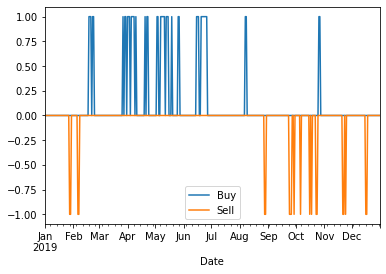

In [ ]:
my_roll = bitcoin['2019']['Close'].rolling(window=28)
bitcoin['2019'].loc[my_roll.max() == bitcoin['2019']['Close'], 'Buy'] = 1
bitcoin['2019'].loc[my_roll.min() == bitcoin['2019']['Close'], 'Sell'] = -1
bitcoin['2019'][['Buy', 'Sell']].plot()
plt.show()